# Project imports

In [33]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Step 1: Load and encode string based features

In [6]:
"""Dump csv to DataFrame"""
penguins = pd.read_csv("data/penguins.csv")
abalone = pd.read_csv("data/abalone.csv")

In [8]:
"""One-Hot encoding"""
dummy_penguin_data = pd.get_dummies(penguins, columns=["island", "sex"])
dummy_penguin_data.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,Adelie,39.1,18.7,181,3750,0,0,1,0,1
1,Adelie,39.5,17.4,186,3800,0,0,1,1,0
2,Adelie,40.3,18.0,195,3250,0,0,1,1,0
3,Adelie,36.7,19.3,193,3450,0,0,1,1,0
4,Adelie,39.3,20.6,190,3650,0,0,1,0,1


In [10]:
"""Manual categorization"""
penguins['island'] = pd.Categorical(penguins['island']).codes
penguins['sex'] = pd.Categorical(penguins['sex']).codes
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181,3750,1
1,Adelie,2,39.5,17.4,186,3800,0
2,Adelie,2,40.3,18.0,195,3250,0
3,Adelie,2,36.7,19.3,193,3450,0
4,Adelie,2,39.3,20.6,190,3650,1


# Step 2: Plot Class Distributions for both datasets

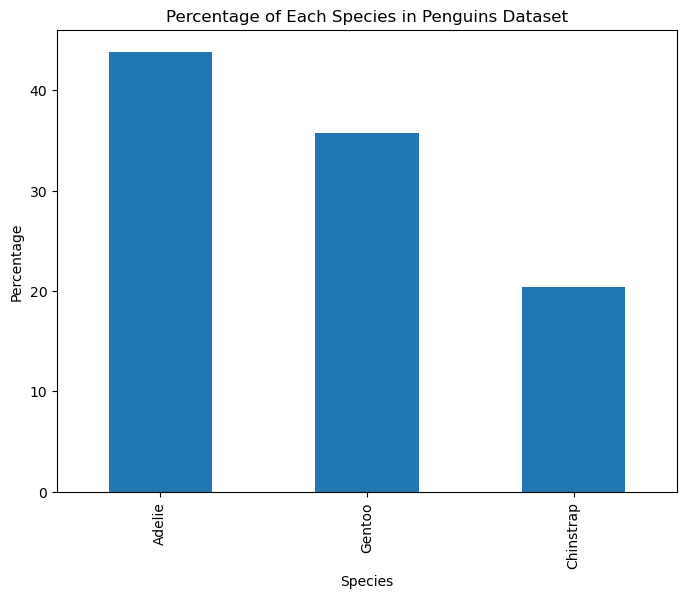

In [12]:
"""Plotting Class Distribution for penguins"""
species_counts = penguins['species'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 6))
species_counts.plot(kind='bar')
plt.title('Percentage of Each Species in Penguins Dataset')
plt.ylabel('Percentage')
plt.xlabel('Species')
plt.savefig('penguin-classes.png')
plt.show()

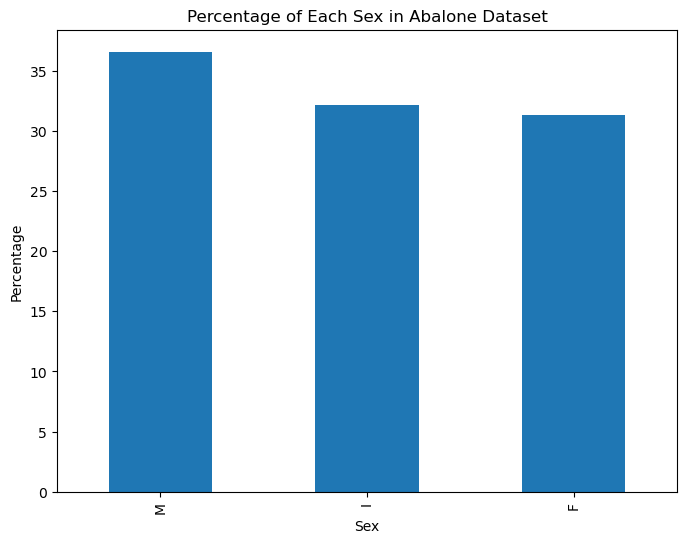

In [13]:
"""Plotting Class Distribution for penguins"""
sex_counts = abalone['Type'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 6))
sex_counts.plot(kind='bar')
plt.title('Percentage of Each Sex in Abalone Dataset')
plt.ylabel('Percentage')
plt.xlabel('Sex')
plt.savefig('abalone-classes.png')
plt.show()

# Step 3: Split data sets

In [14]:
"""Split penguins"""
X_penguins = penguins.drop('species', axis=1)
y_penguins = penguins['species']
X_train_penguins, X_test_penguins, y_train_penguins, y_test_penguins = train_test_split(X_penguins, y_penguins, test_size=0.2, random_state=42)
"""Split abalone"""
X_abalone = abalone.drop('Type', axis=1)
y_abalone = abalone['Type']
X_train_abalone, X_test_abalone, y_train_abalone, y_test_abalone = train_test_split(X_abalone, y_abalone, test_size=0.2, random_state=42)

# Step 4: Classification using different alogrithms

## Base Decision Tree Classifier

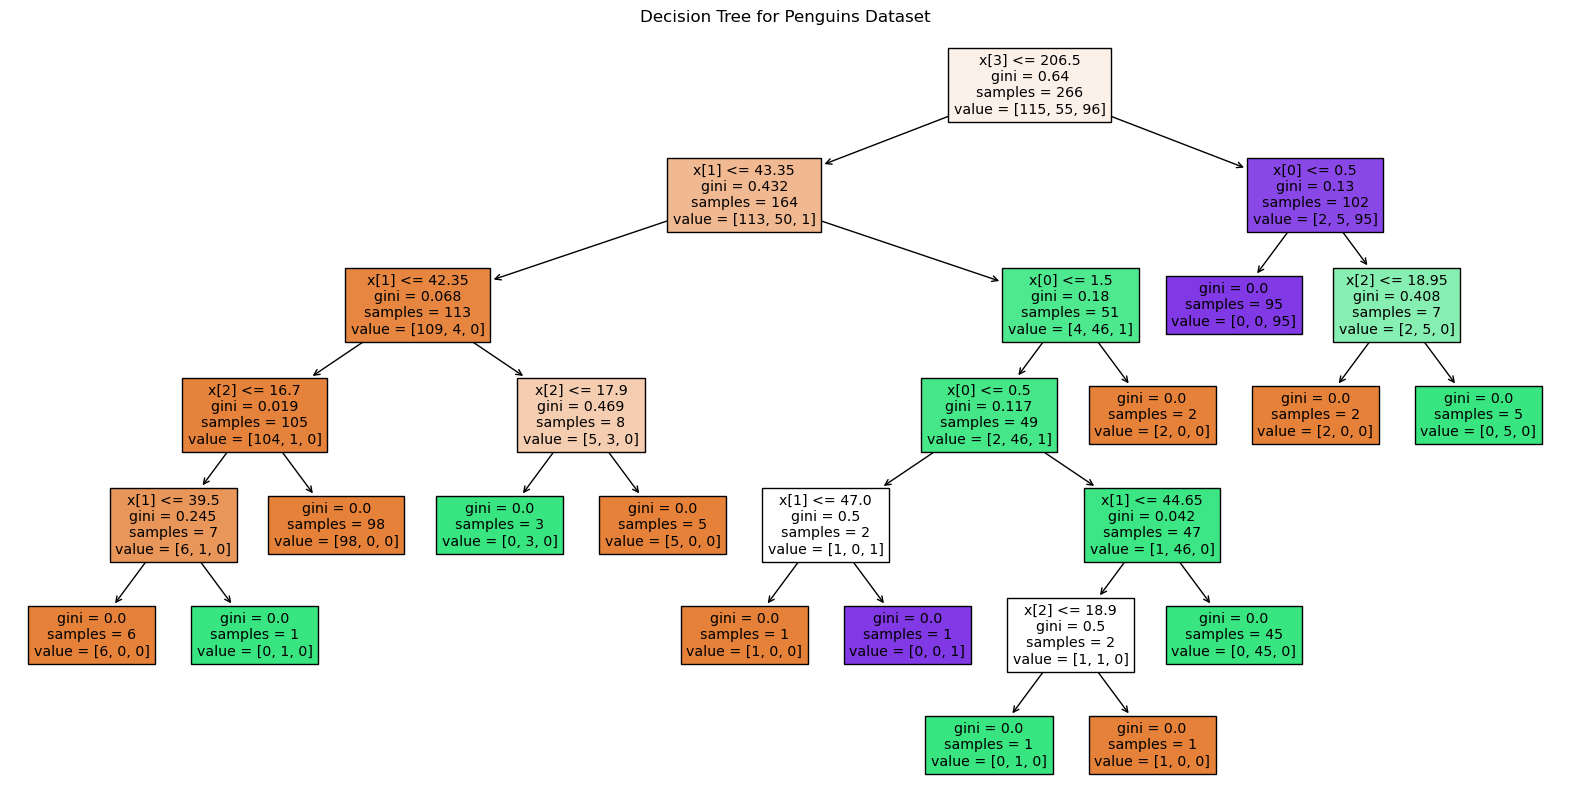

In [16]:
"""Base Decision Tree for penguins"""
base_dt_penguins = DecisionTreeClassifier()

# train the classifier
base_dt_penguins.fit(X_train_penguins, y_train_penguins)

# visualization
plt.figure(figsize=(20,10))
tree.plot_tree(base_dt_penguins, filled=True)
plt.title("Decision Tree for Penguins Dataset")
plt.savefig('base_dt_penguins.png')
plt.show()

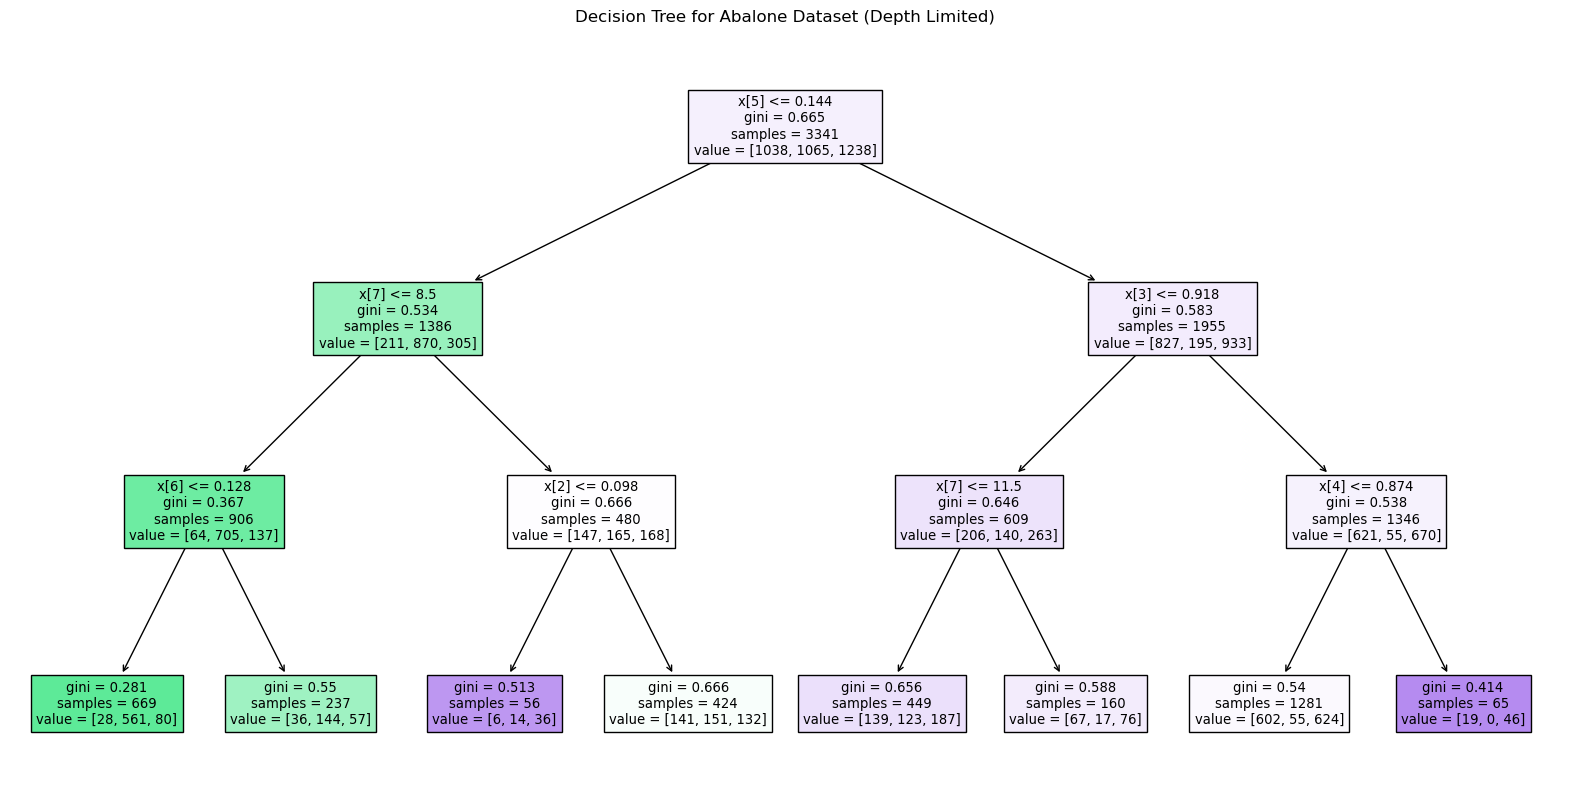

In [17]:
"""Base Decision Tree for abalone"""
base_dt_abalone = DecisionTreeClassifier(max_depth=3)

# train the classifier
base_dt_abalone.fit(X_train_abalone, y_train_abalone)

# visualization
plt.figure(figsize=(20,10))
tree.plot_tree(base_dt_abalone, filled=True)
plt.title("Decision Tree for Abalone Dataset (Depth Limited)")
plt.savefig('base_dt_abalone.png')
plt.show()

## Top Decision Tree Classifier - Grid search optimization

In [18]:
"""Set up - Top-DT for penguins"""
param_grid_penguins = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 4, 6]
}

dt_penguins = DecisionTreeClassifier()

grid_search_penguins = GridSearchCV(estimator=dt_penguins, param_grid=param_grid_penguins, cv=5, scoring='accuracy')

grid_search_penguins.fit(X_train_penguins, y_train_penguins)

print("Best parameters for Penguins dataset:", grid_search_penguins.best_params_)

Best parameters for Penguins dataset: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


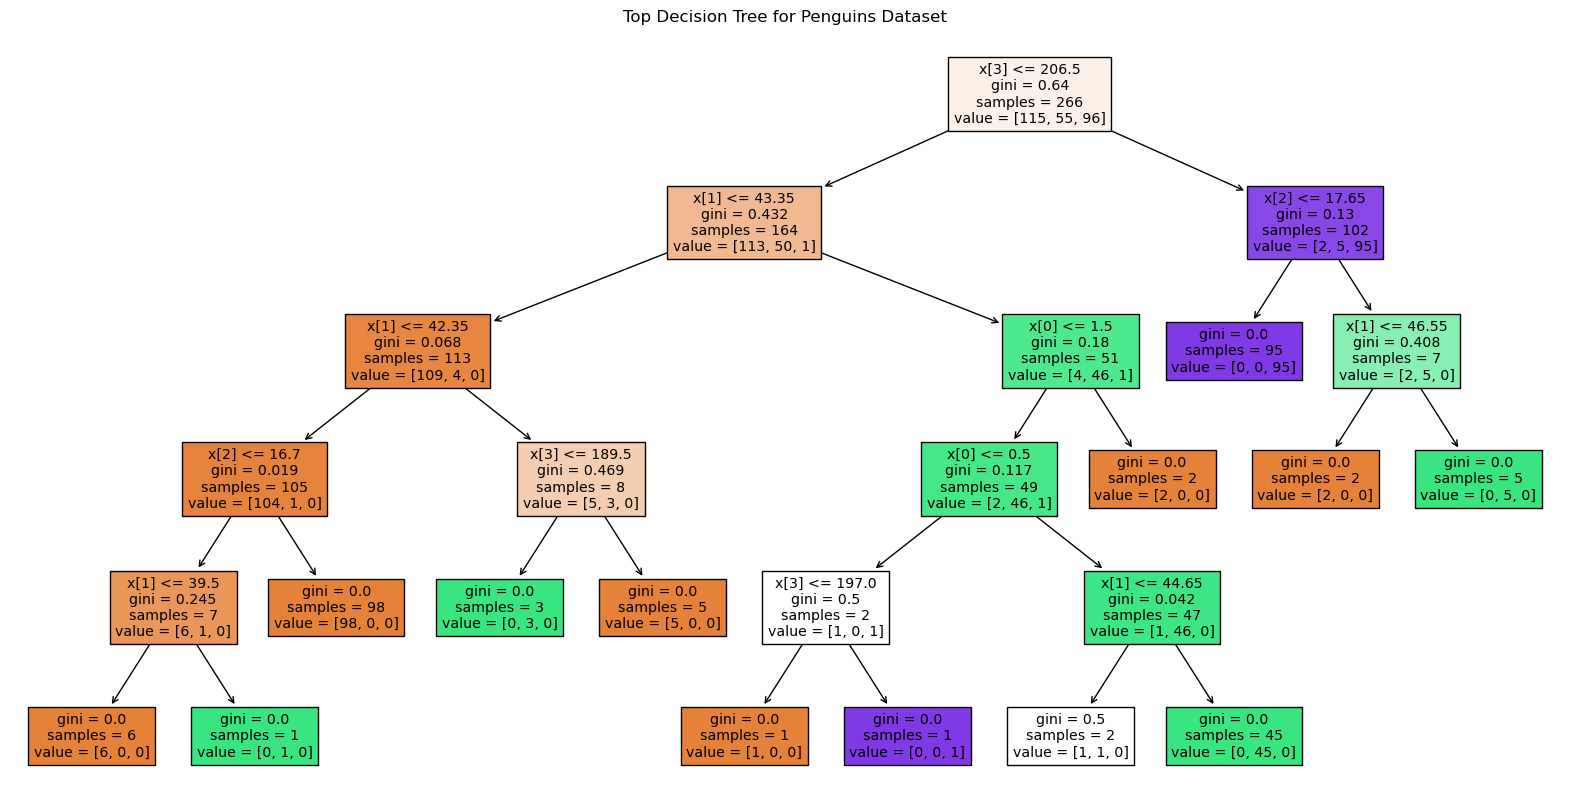

In [19]:
"""Train and visualization of Top-DT for penguins"""
# train the classifier with the best parameters
top_dt_penguins = DecisionTreeClassifier(**grid_search_penguins.best_params_)
top_dt_penguins.fit(X_train_penguins, y_train_penguins)

# visualization
plt.figure(figsize=(20,10))
tree.plot_tree(top_dt_penguins, filled=True)
plt.title("Top Decision Tree for Penguins Dataset")
plt.savefig('top_dt_penguins.png')
plt.show()

In [20]:
"""Set up - Top-DT for abalone"""
param_grid_abalone = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 4, 6]
}

dt_abalone = DecisionTreeClassifier()

grid_search_abalone = GridSearchCV(estimator=dt_abalone, param_grid=param_grid_abalone, cv=5, scoring='accuracy')

grid_search_abalone.fit(X_train_abalone, y_train_abalone)

print("Best parameters for Abalone dataset:", grid_search_abalone.best_params_)

Best parameters for Abalone dataset: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


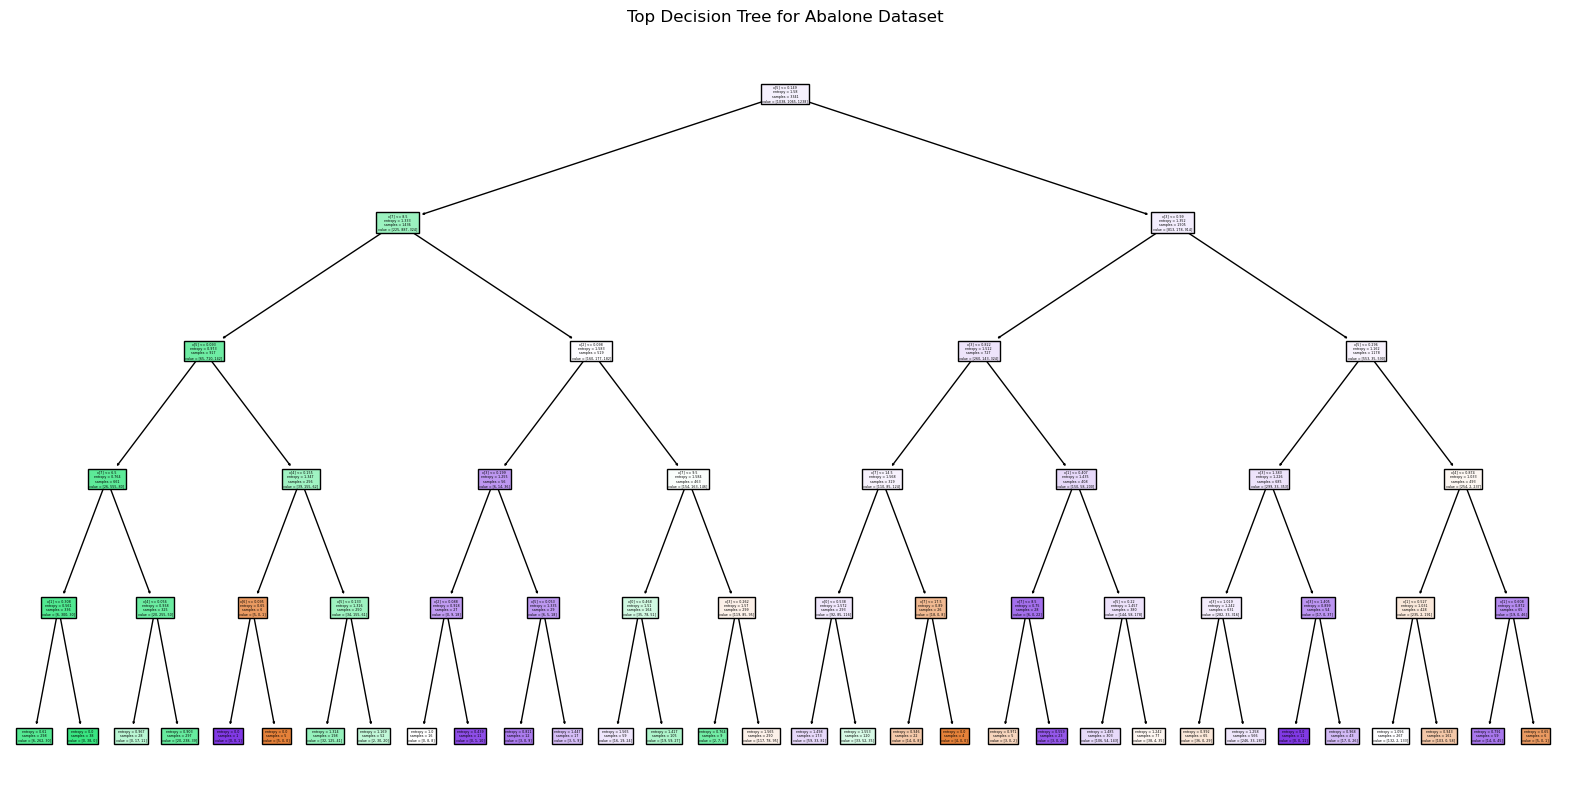

In [21]:
"""Train and visualization of Top-DT for abalone"""
# train the classifier with the best parameters
top_dt_abalone = DecisionTreeClassifier(**grid_search_abalone.best_params_)
top_dt_abalone.fit(X_train_abalone, y_train_abalone)

# visualization
plt.figure(figsize=(20,10))
tree.plot_tree(top_dt_abalone, filled=True)
plt.title("Top Decision Tree for Abalone Dataset")
plt.savefig('top_dt_abalone.png')
plt.show()

## Base Multi-Layered Perceptron

In [22]:
"""Base-MLP for penguins"""
base_mlp_penguins = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd', random_state=42)

# train the classifier
base_mlp_penguins.fit(X_train_penguins, y_train_penguins)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              random_state=42, solver='sgd')

In [25]:
"""Base-MLP for abalone"""
# high number of max_iter to let the graph converge
base_mlp_abalone = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd', max_iter=1000, random_state=42)

# train the classifier
base_mlp_abalone.fit(X_train_abalone, y_train_abalone)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              max_iter=1000, random_state=42, solver='sgd')

## Top Multi-Layered Perceptron - Grid search optimization

In [26]:
"""Grid search set up for penguins"""
param_grid_mlp_penguins = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd']
}

mlp_penguins = MLPClassifier(random_state=42)

grid_search_mlp_penguins = GridSearchCV(estimator=mlp_penguins, param_grid=param_grid_mlp_penguins, cv=5, scoring='accuracy')

# perform the Grid Search
grid_search_mlp_penguins.fit(X_train_penguins, y_train_penguins)

# Print the best parameters
print("Best parameters for Penguins dataset:", grid_search_mlp_penguins.best_params_)

Best parameters for Penguins dataset: {'activation': 'relu', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


In [27]:
# train the classifier with the best parameters
top_mlp_penguins = MLPClassifier(**grid_search_mlp_penguins.best_params_, random_state=42)
top_mlp_penguins.fit(X_train_penguins, y_train_penguins)

MLPClassifier(hidden_layer_sizes=(30, 50), random_state=42)

In [30]:
"""Grid search set up for abalone"""
param_grid_mlp_abalone = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd']
}
# high number of max_iter to let the graph converge
mlp_abalone = MLPClassifier(max_iter=1500, random_state=42)

grid_search_mlp_abalone = GridSearchCV(estimator=mlp_abalone, param_grid=param_grid_mlp_abalone, cv=5, scoring='accuracy')

# perform the Grid Search
grid_search_mlp_abalone.fit(X_train_abalone, y_train_abalone)

# Print the best parameters
print("Best parameters for Abalone dataset:", grid_search_mlp_abalone.best_params_)

Best parameters for Abalone dataset: {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


In [31]:
# train the classifier with the best parameters
top_mlp_abalone = MLPClassifier(**grid_search_mlp_abalone.best_params_, random_state=42)
top_mlp_abalone.fit(X_train_abalone, y_train_abalone)

MLPClassifier(activation='tanh', hidden_layer_sizes=(30, 50), random_state=42)

# Step 5: Evaluate and Save model performances

In [37]:
def evaluate_model(model, X_test, y_test, file_name, model_name):
    # predict the test set
    y_pred = model.predict(X_test)

    # calculate confusion matrix, classification report, and accuracy
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    accuracy = accuracy_score(y_test, y_pred)

    # write the results to text file
    with open(file_name, 'a') as file:
        file.write(f"---------{model_name}---------\n")
        file.write("Confusion Matrix:\n")
        file.write(f"{conf_matrix}\n")
        file.write("Classification Report:\n")
        for label, metrics in class_report.items():
            file.write(f"{label}: {metrics}\n")
        file.write(f"Accuracy: {accuracy}\n\n")

# evaluate each classifier
penguins_models = {
    'Base-DT': base_dt_penguins,
    'Top-DT': top_dt_penguins,
    'Base-MLP': base_mlp_penguins,
    'Top-MLP': top_mlp_penguins,
}

abalone_models = {
    'Base-DT': base_dt_abalone,
    'Top-DT': top_dt_abalone,
    'Base-MLP': base_mlp_abalone,
    'Top-MLP': top_mlp_abalone,
}

for name, model in penguins_models.items():
    evaluate_model(model, X_test_penguins, y_test_penguins, 'output/penguin-performance.txt', name)

for name, model in abalone_models.items():
    evaluate_model(model, X_test_abalone, y_test_abalone, 'output/abalone-performance.txt', name)

# Step 6: Repeated Performance Trials

In [38]:
def repeated_evaluation(X_test, y_test, X_train, y_train, file_name, model_dict):
    for name, model in model_dict.items():
        accuracies = []  # initialize accuracies list for each model
        for i in range(5):
            model.fit(X_train, y_train)
            accuracy = accuracy_score(y_test, model.predict(X_test))
            accuracies.append(accuracy)

        # Calculate average accuracy and variance
        average_accuracy = np.mean(accuracies)
        variance_accuracy = np.var(accuracies)

        # Append to the performance file
        with open(file_name, 'a') as file:
            file.write(f"{name} Average Accuracy: {average_accuracy}, Variance: {variance_accuracy}\n")

penguins_models = {
    'Base-DT': base_dt_penguins,
    'Top-DT': top_dt_penguins,
    'Base-MLP': base_mlp_penguins,
    'Top-MLP': top_mlp_penguins,
}

abalone_models = {
    'Base-DT': base_dt_abalone,
    'Top-DT': top_dt_abalone,
    'Base-MLP': base_mlp_abalone,
    'Top-MLP': top_mlp_abalone,
}

# repeated evaluations for penguins
repeated_evaluation(X_test_penguins, y_test_penguins, X_train_penguins, y_train_penguins, 'output/penguin-performance.txt', penguins_models)
# repeated evaluations for abalone
repeated_evaluation(X_test_abalone, y_test_abalone, X_train_abalone, y_train_abalone, 'output/abalone-performance.txt', abalone_models)